In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [126]:
ins_df = pd.read_csv('insurance.csv')
ins_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [127]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# df['File Number'] = le.fit_transform(df['File Number'])
ins_df['sex'] = le.fit_transform(ins_df['sex'])
ins_df['smoker'] = le.fit_transform(ins_df['smoker'])
ins_df['region'] = le.fit_transform(ins_df['region'])
ins_df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [128]:
insurance_df = pd.DataFrame(ins_df, columns = ['age', 'sex', 'children','smoker','charges','bmi', 'region'])
insurance_df

,age,sex,children,smoker,charges,bmi,region
0,19,0,0,1,16884.92400,27.900,3
1,18,1,1,0,1725.55230,33.770,2
2,28,1,3,0,4449.46200,33.000,2
3,33,1,0,0,21984.47061,22.705,1
4,32,1,0,0,3866.85520,28.880,1
...,...,...,...,...,...,...,...
1333,50,1,3,0,10600.54830,30.970,1
1334,18,0,0,0,2205.98080,31.920,0
1335,18,0,0,0,1629.83350,36.850,2
1336,21,0,0,0,2007.94500,25.800,3


In [129]:
insurance_df.isnull().sum()

age         0
sex         0
children    0
smoker      0
charges     0
bmi         0
region      0
dtype: int64

In [130]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
insurance_df = scaler.fit_transform(insurance_df)
insurance_df = pd.DataFrame(insurance_df)
insurance_df

,0,1,2,3,4,5,6
0,-1.438764,-1.010519,-0.908614,1.970587,0.298584,-0.453320,1.343905
1,-1.509965,0.989591,-0.078767,-0.507463,-0.953689,0.509621,0.438495
2,-0.797954,0.989591,1.580926,-0.507463,-0.728675,0.383307,0.438495
3,-0.441948,0.989591,-0.908614,-0.507463,0.719843,-1.305531,-0.466915
4,-0.513149,0.989591,-0.908614,-0.507463,-0.776802,-0.292556,-0.466915
...,...,...,...,...,...,...,...
1333,0.768473,0.989591,1.580926,-0.507463,-0.220551,0.050297,-0.466915
1334,-1.509965,-1.010519,-0.908614,-0.507463,-0.914002,0.206139,-1.372326
1335,-1.509965,-1.010519,-0.908614,-0.507463,-0.961596,1.014878,0.438495
1336,-1.296362,-1.010519,-0.908614,-0.507463,-0.930362,-0.797813,1.343905


In [131]:
x = insurance_df.iloc[:,4:6]
x

,4,5
0,0.298584,-0.453320
1,-0.953689,0.509621
2,-0.728675,0.383307
3,0.719843,-1.305531
4,-0.776802,-0.292556
...,...,...
1333,-0.220551,0.050297
1334,-0.914002,0.206139
1335,-0.961596,1.014878
1336,-0.930362,-0.797813


C:\Users\sachi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


Text(0, 0.5, 'SSE')

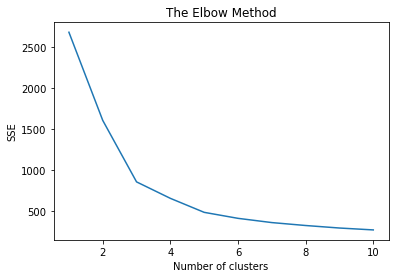

In [132]:
from sklearn.cluster import KMeans
scores = []
#K = range(1, 11)
#for k in K:
for i in range(1, 11):
    model = KMeans(n_clusters=i, random_state = 0)
    #model.fit(x.reshape(-1,1))
    model.fit(x)
    scores.append(model.inertia_)
    
plt.plot(range(1, 11), scores)
#plt.plot(K, scores, 'bx-')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')

In [133]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, tol=0.01, random_state=0)
#kmeans.fit(x.reshape(-1,1))
kmeans.fit(x)
# clusters = kmeans.predict(x.reshape(-1,1))
clusters = kmeans.predict(x)
print(clusters)

[1 2 2 ... 2 1 0]


In [134]:
centres=kmeans.cluster_centers_
print(centres)

[[ 2.10298708  0.65121145]
 [-0.27003071 -0.81005375]
 [-0.44512965  0.81177917]]


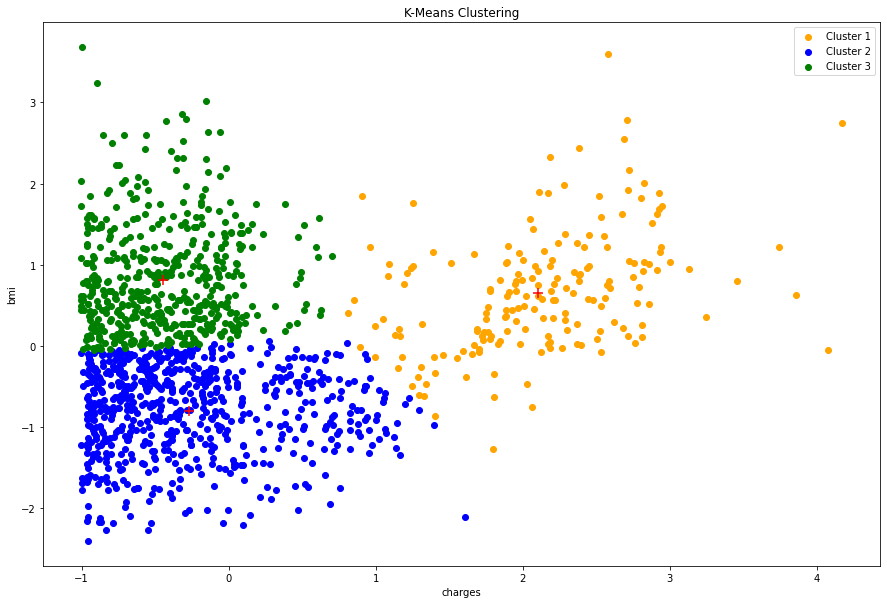

In [135]:
colors = ['orange', 'blue', 'green', 'magenta']
plt.figure(figsize=(15,10))
for i in range(3):
    plt.scatter(x.iloc[clusters == i, 0], x.iloc[clusters == i, 1], c=colors[i], label=f'Cluster {i + 1}')
    #plt.scatter(x[clusters == i], x[clusters == i], c=colors[i])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='red', marker='+', s=100)

plt.title('K-Means Clustering')
plt.xlabel('charges')
plt.ylabel('bmi')
plt.legend(loc='upper right')

In [136]:
mean_shift_x = insurance_df.iloc[:, 4:6].values
mean_shift_x

array([[ 0.2985838 , -0.45332   ],
       [-0.95368917,  0.5096211 ],
       [-0.72867467,  0.38330685],
       ...,
       [-0.96159623,  1.0148781 ],
       [-0.93036151, -0.79781341],
       [ 1.31105347, -0.26138796]])

In [137]:
from sklearn.cluster import estimate_bandwidth
bandwidth = estimate_bandwidth(mean_shift_x, quantile=0.15 )
bandwidth

0.8463268573820347

In [138]:
from sklearn.cluster import MeanShift
model_meanshift = MeanShift(bandwidth = bandwidth)
model_meanshift.fit(mean_shift_x)

MeanShift(bandwidth=0.8463268573820347)

In [139]:
clusters_meanshift = model_meanshift.predict(mean_shift_x)
clusters_meanshift

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [140]:
meanshift_centres=model_meanshift.cluster_centers_
print(meanshift_centres)

[[-0.50375447 -0.11857113]
 [ 2.19603245  0.56194838]
 [-0.94747656  3.45996107]
 [ 4.17166316  2.74718781]
 [ 1.6078467  -2.11591081]]


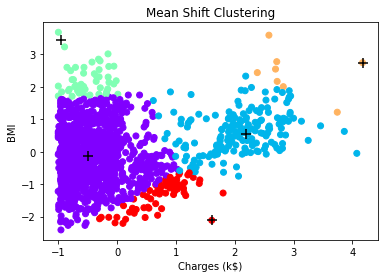

In [141]:
plt.scatter(x.iloc[:, 0], x.iloc[:, 1], c=clusters_meanshift, cmap="rainbow")
plt.scatter(model_meanshift.cluster_centers_[:, 0],
            model_meanshift.cluster_centers_[:, 1],
            color = 'black',
            marker = '+',
            s = 100)
plt.title('Mean Shift Clustering')
plt.xlabel('Charges (k$)')
plt.ylabel('BMI')

plt.show()

                                        DATA REFINED DATASET

In [142]:
df = pd.read_csv('data_refined.csv')
df

,Unnamed: 0,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [143]:
from sklearn.preprocessing import StandardScaler
scaler2 = StandardScaler()
df2 = scaler2.fit_transform(df)
df = pd.DataFrame(df2, columns = df.columns)
df = df.drop(['Unnamed: 0'], axis = 1)
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.297676,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.297676,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.297676,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,1.297676,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.297676,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1.297676,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.297676,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,1.297676,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.297676,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


In [144]:
df.corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


In [145]:
x2 = df.iloc[:,1:31]
x2

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


C:\Users\sachi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


Text(0, 0.5, 'SSE')

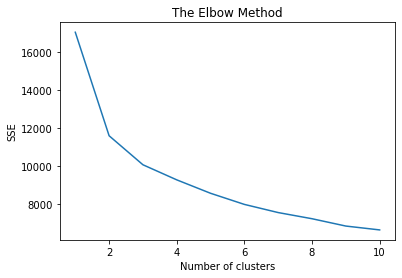

In [146]:
from sklearn.cluster import KMeans
scores = []
#K = range(1, 11)
#for k in K:
for i in range(1, 11):
    model = KMeans(n_clusters=i, random_state = 0)
    #model.fit(x.reshape(-1,1))
    model.fit(x2)
    scores.append(model.inertia_)
    
plt.plot(range(1, 11), scores)
#plt.plot(K, scores, 'bx-')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')

In [147]:
from sklearn.cluster import KMeans

kmeans2 = KMeans(n_clusters=3, tol=0.01, random_state=0)
#kmeans.fit(x.reshape(-1,1))
kmeans2.fit(x2)
# clusters = kmeans.predict(x.reshape(-1,1))
clusters2 = kmeans2.predict(x2)
print(clusters2)

[2 2 2 0 2 0 2 0 0 0 1 0 2 1 0 0 1 0 2 1 1 1 0 2 2 2 0 2 0 2 2 0 2 2 0 0 0
 1 1 0 1 0 2 0 1 2 1 0 1 1 1 1 1 2 1 1 2 0 1 1 1 1 0 1 0 0 1 1 0 1 2 0 0 1
 1 2 1 2 2 1 1 0 2 2 1 2 1 2 1 0 1 1 1 1 0 2 1 1 1 0 1 1 1 1 1 0 1 1 2 1 1
 0 0 1 1 1 1 0 0 1 1 2 2 1 1 1 1 2 0 2 1 1 1 1 2 1 1 1 2 1 1 1 1 1 1 0 0 1
 1 1 1 0 0 1 1 1 2 1 1 1 1 2 2 1 2 1 1 1 2 1 1 1 0 1 1 1 0 0 1 1 2 2 1 1 1
 1 1 1 1 1 0 1 1 0 0 1 0 2 2 0 1 2 2 0 1 1 1 1 0 1 2 1 2 0 0 0 0 1 2 2 1 1
 1 0 1 1 1 1 1 0 0 1 1 2 1 1 2 2 1 2 1 1 0 1 2 1 1 0 1 1 2 1 2 1 2 1 2 0 2
 0 2 1 2 1 2 2 1 1 1 0 1 1 2 1 1 1 1 1 1 1 2 1 2 0 1 1 1 1 0 1 0 1 1 1 1 1
 1 1 1 1 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 0 1 1 2 1 2 1 1 1 1 0 0 0 1 1
 1 1 2 1 2 1 2 1 1 1 2 1 1 1 1 1 1 1 0 2 0 1 1 0 1 1 1 1 1 1 1 1 2 2 1 2 2
 0 1 2 2 1 1 0 1 1 0 1 1 1 0 1 1 1 1 0 2 1 1 0 2 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 2 1 1 1 1 1 1 1 1 2 1 1 1 0 1 1 1 1 1 1 1 1 0 1 2 2 1 0 1 1 1 1 0 2 1 1
 1 1 2 1 1 2 1 2 1 1 1 1 1 1 1 1 2 2 1 1 1 0 1 1 2 0 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 0 1 2 1 1 1 1 2 

In [148]:
centres2=kmeans2.cluster_centers_
print(centres2)

[[-0.18065056  0.17440239 -0.10915953 -0.22853532  0.84687721  1.02262023
   0.77813054  0.49477125  0.75275651  1.17682261 -0.09903332  0.03809863
  -0.02679067 -0.18356244  0.44062823  1.05773531  0.89181064  0.75455766
   0.28553595  1.01679867 -0.10485827  0.31220034 -0.02110364 -0.17322494
   0.96016409  1.15012124  1.03386688  0.73482153  0.79996709  1.35668909]
 [-0.44945996 -0.24465026 -0.47106102 -0.449369   -0.3611568  -0.57575507
  -0.60097646 -0.59729354 -0.34423368 -0.24138246 -0.41706031 -0.03857826
  -0.42549748 -0.38790577 -0.09961433 -0.4474477  -0.38521291 -0.45260397
  -0.09469893 -0.32324354 -0.4869181  -0.25772346 -0.5068796  -0.47326477
  -0.37491524 -0.53583889 -0.5663636  -0.59966113 -0.31760262 -0.41252627]
 [ 1.61235785  0.63193293  1.6176198   1.65520391  0.40185957  0.93566028
   1.23726593  1.48066633  0.43207212 -0.28168775  1.43433263  0.09010047
   1.39646095  1.41645505 -0.07568373  0.49020493  0.43896537  0.77996806
   0.04818579  0.12649839  1.6648874

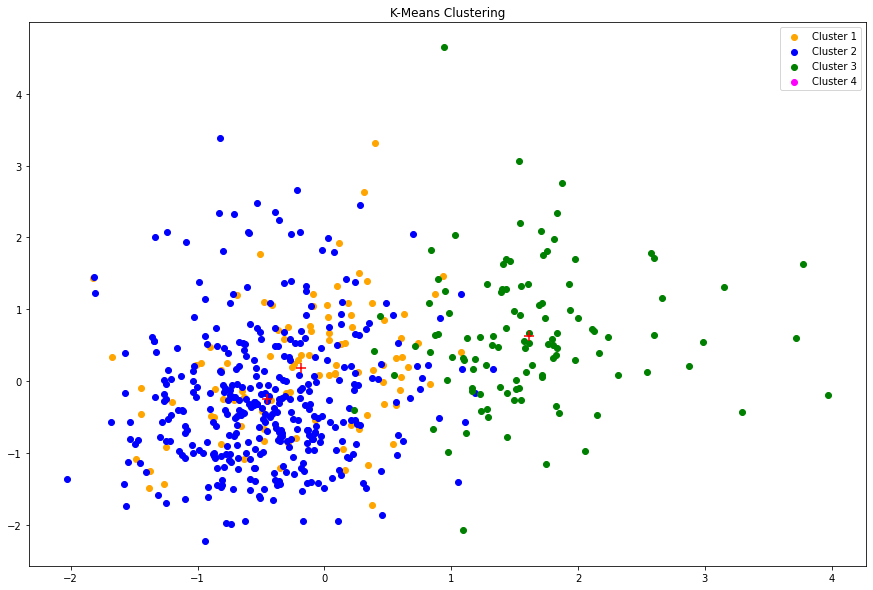

In [149]:
colors = ['orange', 'blue', 'green', 'magenta', 'red', 'yellow']
plt.figure(figsize=(15,10))
for i in range(4):
    plt.scatter(x2.iloc[clusters2 == i, 0], x2.iloc[clusters2 == i, 1], c=colors[i], label=f'Cluster {i + 1}')
    #plt.scatter(x[clusters == i], x[clusters == i], c=colors[i])
plt.scatter(kmeans2.cluster_centers_[:, 0], kmeans2.cluster_centers_[:, 1], color='red', marker='+', s=100)

plt.title('K-Means Clustering')
plt.xlabel('')
plt.ylabel('')
plt.legend(loc='upper right')

In [167]:
from sklearn.cluster import MeanShift
model_meanshift2 = MeanShift(bandwidth = 8)
model_meanshift2.fit(x2)

MeanShift(bandwidth=8)

In [168]:
clusters_meanshift2 = model_meanshift2.predict(x2)
clusters_meanshift2

array([3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [169]:
meanshift_centres2=model_meanshift2.cluster_centers_
print(meanshift_centres2)

[[-0.10793546 -0.05257318 -0.11747783 -0.12512057 -0.08830385 -0.17887609
  -0.19183988 -0.16131838 -0.1073065  -0.12204582 -0.15333472 -0.06326288
  -0.15934199 -0.15254087 -0.05921738 -0.16633644 -0.15609743 -0.13115631
  -0.10072459 -0.1542503  -0.11263229 -0.04109986 -0.12225927 -0.1284188
  -0.05527203 -0.13503563 -0.15086136 -0.13086045 -0.07405098 -0.11586273]
 [ 3.97128765 -0.19073771  3.97612984  5.24484062  1.26957147  0.89562827
   2.90397341  2.8523206  -0.59736235 -1.06995223  8.90690934  0.470181
   9.46198577 10.67661388  2.13642698  0.12529659  1.06090151  0.36884254
   3.30395403  0.25762553  2.45202493 -1.17365155  2.41976539  2.84503559
  -0.79643651 -0.65309312  0.22985663  0.68357946 -2.0266839  -1.59020217]
 [ 3.77531785  1.62437465  3.91022552  5.25052883  0.85681191  1.79013809
   3.44885915  3.09478403  0.91047727 -0.93102704  7.73030688  0.16174254
   7.81353384 11.04184226  0.20301526  1.5795424   1.61329751  2.30075966
  -0.43252859  0.28864214  4.09418939  

Text(0, 0.5, '')

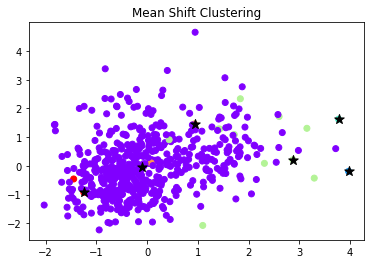

In [170]:
plt.scatter(x2.iloc[:, 0], x2.iloc[:, 1], c=clusters_meanshift2, cmap="rainbow")
plt.scatter(model_meanshift2.cluster_centers_[:, 0],
            model_meanshift2.cluster_centers_[:, 1],
            color = 'black',
            marker = '*',
            s = 100)
plt.title('Mean Shift Clustering')
plt.xlabel('')
plt.ylabel('')
